In [22]:
from sklearn.datasets import fetch_california_housing as dataset

In [44]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
dataset = dataset()

In [25]:
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['Price'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [26]:
y = df['Price']
X = df.drop(columns = 'Price')

In [27]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.33, random_state = 10)

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [33]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Slope or Coefficient:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Slope or Coefficient: [ 0.82872299  0.1231163  -0.27068752  0.32859106  0.00213572 -0.02810091
 -0.93017985 -0.89505497]
Intercept: 2.0634768086491184


In [38]:
y_test_prediction = regressor.predict(X_test)

In [39]:
mse = mean_squared_error(y_test, y_test_prediction) # Actual data and Predicted Data
mae = mean_absolute_error(y_test, y_test_prediction)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.552233239936362
Mean Absolute Error: 0.5371056943007959
Root Mean Squared Error: 0.743123973463622


In [40]:
score = r2_score(y_test, y_test_prediction)
print("Accuracy of r squared:", score)

n = (len(y_test) - 1) # No of observations
k = X_test.shape[1] # No of predictor variables
adjusted_score = 1 - ((1 - score) * (n - 1)  / (n - k - 1))
print("Accuracy of Adjusted r squared:", adjusted_score)

Accuracy of r squared: 0.5935958526436639
Accuracy of Adjusted r squared: 0.5931178707002869


Text(0, 0.5, 'Test Predicted Data')

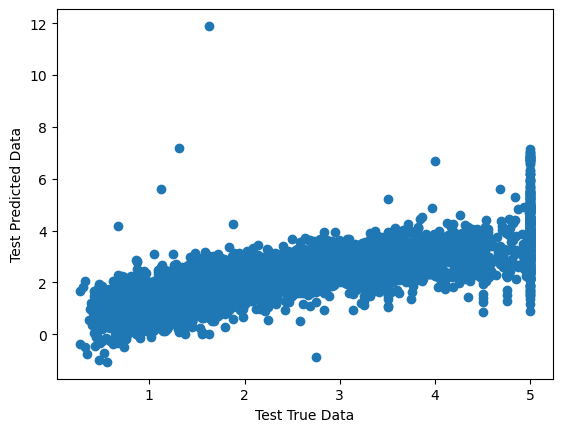

In [42]:
# Assumptions:
plt.scatter(y_test, y_test_prediction)
plt.xlabel("Test True Data")
plt.ylabel("Test Predicted Data")

C:\Users\rishi\AppData\Local\Temp\ipykernel_25056\2011072987.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde = True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

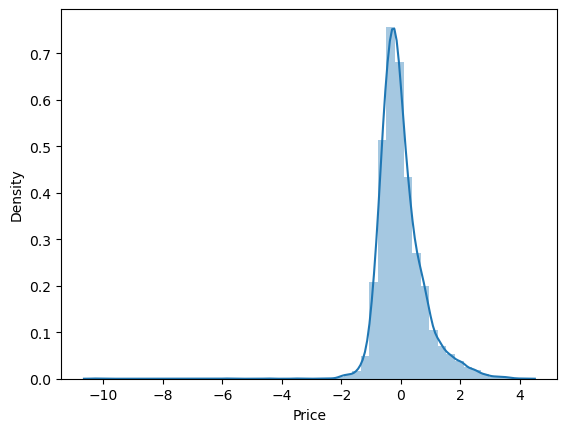

In [45]:
residuals = y_test - y_test_prediction
sns.distplot(residuals, kde = True)

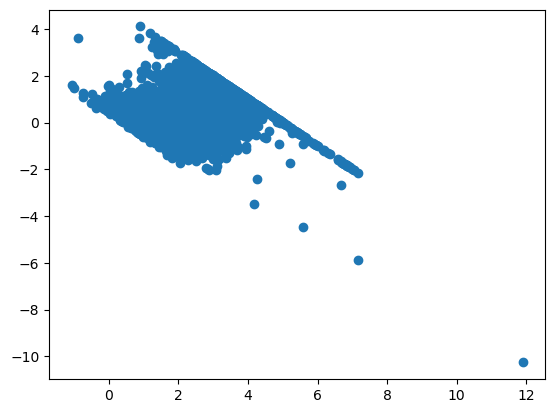

In [46]:
plt.scatter(y_test_prediction, residuals)